In [14]:
# Replace with your folder name
dataset_path = '/content/drive/MyDrive/brain_tumer_ml/Dataset'
train_dir = dataset_path + '/Train'
test_dir = dataset_path + '/Test'


In [15]:
import tensorflow as tf

In [16]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [17]:
img_height = 64
img_width = 64

train_ds = tf.keras.utils.image_dataset_from_directory(
    train_dir,
    labels='inferred',
    label_mode='int',
    color_mode='grayscale',
    batch_size=32,
    image_size=(img_height, img_width),
    shuffle=True,
    seed=123
)

test_ds = tf.keras.utils.image_dataset_from_directory(
    test_dir,
    labels='inferred',
    label_mode='int',
    color_mode='grayscale',
    batch_size=32,
    image_size=(img_height, img_width),
    shuffle=False
)


class_names = train_ds.class_names
print("Classes:", class_names)


normalization_layer = tf.keras.layers.Rescaling(1./255)
train_ds = train_ds.map(lambda x, y: (normalization_layer(x), y))
test_ds = test_ds.map(lambda x, y: (normalization_layer(x), y))


Found 2065 files belonging to 2 classes.
Found 263 files belonging to 2 classes.
Classes: ['no', 'yes']


In [18]:
print("Classes:", class_names)
print("Number of classes:", len(class_names))

Classes: ['no', 'yes']
Number of classes: 2


In [20]:
model = tf.keras.Sequential([
    tf.keras.layers.Flatten(input_shape=(64, 64, 1)),
    tf.keras.layers.Dense(128, activation='relu'),
    tf.keras.layers.Dense(64, activation='relu'),
    tf.keras.layers.Dense(1, activation='sigmoid')  # Binary output
])

model.compile(
    optimizer='adam',
    loss='binary_crossentropy',
    metrics=['accuracy']
)

model.summary()




/usr/local/lib/python3.11/dist-packages/keras/src/layers/reshaping/flatten.py:37: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


Model: "sequential"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ flatten (Flatten)               │ (None, 4096)           │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense (Dense)                   │ (None, 128)            │       524,416 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_1 (Dense)                 │ (None, 64)             │         8,256 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_2 (Dense)                 │ (None, 1)              │            65 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 532,737 (2.03 MB)

 Trainable params: 532,737 (2.03 MB)

 Non-trainable params: 0 (0.00 B)

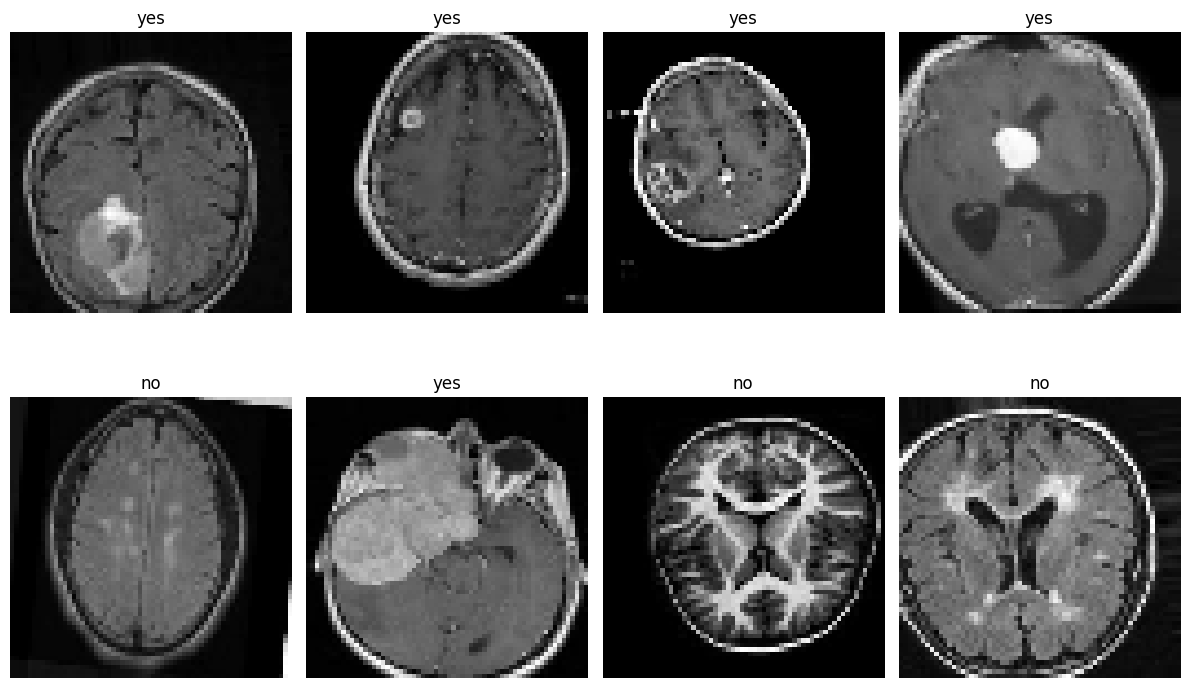

In [30]:
import matplotlib.pyplot as plt
import random

unbatched_ds = train_ds.unbatch()

all_images = list(unbatched_ds)
sampled = random.sample(all_images, 8)
plt.figure(figsize=(12, 8))

for i, (image, label) in enumerate(sampled):
    plt.subplot(2, 4, i + 1)
    plt.imshow(image.numpy().squeeze(), cmap='gray')
    plt.title(class_names[int(label.numpy())])
    plt.axis('off')

plt.tight_layout()
plt.show()


In [ ]:
test_ds

<_MapDataset element_spec=(TensorSpec(shape=(None, 64, 64, 1), dtype=tf.float32, name=None), TensorSpec(shape=(None,), dtype=tf.int32, name=None))>

In [ ]:
history = model.fit(
    train_ds,
    validation_data=test_ds,
    epochs=20
)

Epoch 1/20
65/65 ━━━━━━━━━━━━━━━━━━━━ 13s 191ms/step - accuracy: 0.6009 - loss: 0.6735 - val_accuracy: 0.7186 - val_loss: 0.5573
Epoch 2/20
65/65 ━━━━━━━━━━━━━━━━━━━━ 8s 128ms/step - accuracy: 0.7057 - loss: 0.5598 - val_accuracy: 0.7110 - val_loss: 0.5755
Epoch 3/20
65/65 ━━━━━━━━━━━━━━━━━━━━ 7s 115ms/step - accuracy: 0.7379 - loss: 0.5386 - val_accuracy: 0.6578 - val_loss: 0.7065
Epoch 4/20
65/65 ━━━━━━━━━━━━━━━━━━━━ 10s 118ms/step - accuracy: 0.7405 - loss: 0.5112 - val_accuracy: 0.7338 - val_loss: 0.5617
Epoch 5/20
65/65 ━━━━━━━━━━━━━━━━━━━━ 9s 132ms/step - accuracy: 0.7868 - loss: 0.4675 - val_accuracy: 0.7529 - val_loss: 0.5569
Epoch 6/20
65/65 ━━━━━━━━━━━━━━━━━━━━ 9s 120ms/step - accuracy: 0.7797 - loss: 0.4634 - val_accuracy: 0.6616 - val_loss: 0.7253
Epoch 7/20
65/65 ━━━━━━━━━━━━━━━━━━━━ 8s 120ms/step - accuracy: 0.7919 - loss: 0.4460 - val_accuracy: 0.6730 - val_loss: 0.6369
Epoch 8/20
65/65 ━━━━━━━━━━━━━━━━━━━━ 11s 129ms/step - accuracy: 0.8047 - loss: 0.4361 - val_accuracy:

In [ ]:
import numpy as np

predicted_labels = []
true_labels = []


for images, labels in test_ds:

    preds = model.predict(images)

    preds = (preds > 0.5).astype(int).flatten()


    predicted_labels.extend(preds)
    true_labels.extend(labels.numpy())

predicted_labels = np.array(predicted_labels)
true_labels = np.array(true_labels)


accuracy = np.mean(true_labels == predicted_labels)
print(f"Manual Accuracy: {accuracy:.4f}")

loss, eval_acc = model.evaluate(test_ds)
print(f"Model Evaluate Accuracy: {eval_acc:.4f}")


1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 57ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 78ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 68ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 63ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 64ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 51ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 32ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 46ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 36ms/step
Manual Accuracy: 0.6578
9/9 ━━━━━━━━━━━━━━━━━━━━ 1s 82ms/step - accuracy: 0.6663 - loss: 1.0138
Model Evaluate Accuracy: 0.6578


In [21]:
img_path = '/content/drive/MyDrive/brain_tumer_ml/Dataset/Test/no/14 no.jpg'

img = tf.keras.utils.load_img(
    img_path, color_mode='grayscale', target_size=(64, 64)
)


img_array = tf.keras.utils.img_to_array(img)


img_array = img_array / 255.0


img_array = tf.expand_dims(img_array, axis=0)

# Predict
prediction = model.predict(img_array)

if prediction[0][0] > 0.5:
    print("Prediction: YES")
else:
    print("Prediction: NO")

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 110ms/step
Prediction: NO


In [ ]:
model.save('my_model.h5')

In [ ]:
loss, eval_acc = model.evaluate(test_ds)

9/9 ━━━━━━━━━━━━━━━━━━━━ 1s 116ms/step - accuracy: 0.6663 - loss: 1.0138
